In [1]:
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd
#import seaborn as sns
from pyforest import *

In [2]:
data = pd.read_csv('loansData.csv')

In [3]:
data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [4]:
data.tail()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
23735,30000,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
65882,16000,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
55610,10000,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
38576,6000,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years
3116,9000,5242.75,13.79%,36 months,debt_consolidation,6.76%,NY,RENT,3875.00,670-674,7.0,7589.0,0.0,10+ years


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 81174 to 3116
Data columns (total 14 columns):
Amount.Requested                  2500 non-null int64
Amount.Funded.By.Investors        2500 non-null float64
Interest.Rate                     2500 non-null object
Loan.Length                       2500 non-null object
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2500 non-null object
State                             2500 non-null object
Home.Ownership                    2500 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2500 non-null object
Open.CREDIT.Lines                 2498 non-null float64
Revolving.CREDIT.Balance          2498 non-null float64
Inquiries.in.the.Last.6.Months    2498 non-null float64
Employment.Length                 2423 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 293.0+ KB


In [6]:
#Interest.Rate is an object but it should be a float so i removed the % sign and converted it to a float
data['Interest.Rate'] = data['Interest.Rate'].str[:-1].astype(float)

In [7]:
#Stripping months from Loan.Length and converting it to a string
data['Loan.Length'] = data['Loan.Length'].str.strip('months').astype(int)

In [8]:
#data['Debt.To.Income.Ratio'] = data['Debt.To.Income.Ratio'].str[:-1].astype(float)

In [9]:
#data['FICO.Range'] = data['FICO.Range'].str.split('-')

In [10]:
#data['FICO.Range'] = data['FICO.Range'].str[0].astype(float)

In [11]:
#data.rename(columns={'FICO.Range':'FICO.Score'}, inplace = True)

In [12]:
data.isnull().any()

Amount.Requested                  False
Amount.Funded.By.Investors        False
Interest.Rate                     False
Loan.Length                       False
Loan.Purpose                      False
Debt.To.Income.Ratio              False
State                             False
Home.Ownership                    False
Monthly.Income                     True
FICO.Range                        False
Open.CREDIT.Lines                  True
Revolving.CREDIT.Balance           True
Inquiries.in.the.Last.6.Months     True
Employment.Length                  True
dtype: bool

In [13]:
data = data.drop(columns='Loan.Purpose')

In [14]:
data.describe()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2500.000000,2500.000000,2500.000000,2500.000000,2499.000000,2498.000000,2498.000000,2498.000000
mean,12406.500000,12001.573236,13.066996,41.260800,5688.931321,10.075661,15244.559648,0.906325
std,7801.544872,7745.320754,4.178230,9.930893,3963.118185,4.508644,18308.549795,1.231036
min,1000.000000,-0.010000,5.420000,36.000000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,10.160000,36.000000,3500.000000,7.000000,5585.750000,0.000000
50%,10000.000000,10000.000000,13.110000,36.000000,5000.000000,9.000000,10962.000000,0.000000
75%,17000.000000,16000.000000,15.800000,36.000000,6800.000000,13.000000,18888.750000,1.000000
max,35000.000000,35000.000000,24.890000,60.000000,102750.000000,38.000000,270800.000000,9.000000


In [15]:
plt.figure()

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [17]:
data['Interest.Rate']

81174      8.90
99592     12.12
80059     21.98
15825      9.99
33182     11.71
62403     15.31
48808      7.90
22090     17.14
76404     14.33
15867      6.91
94971     19.72
36911     14.27
41200     21.67
83869      8.90
53853      7.62
21399     15.65
62127     12.12
23446     10.37
44987      9.76
17977      9.99
86099     21.98
99483     19.05
28798     17.99
24168     11.99
10356     16.82
46027      7.90
2238      14.42
65278     15.31
4227       8.59
50182      7.90
          ...  
84265     22.95
80231      7.90
49533     22.45
102514    15.13
78618     18.75
86953     14.09
80129     14.09
85216      8.90
38247     11.71
91245     15.80
53041      6.03
63051      6.62
14446      7.51
68628     14.33
98758     10.16
13070     10.75
45836     17.27
52330     19.99
48243     15.81
63256     18.75
42124     11.71
78043      7.62
925       10.08
74047     23.28
49957     14.65
23735     16.77
65882     14.09
55610     13.99
38576     12.42
3116      13.79
Name: Interest.Rate, Len

Text(0, 0.5, 'Amount.Requested')

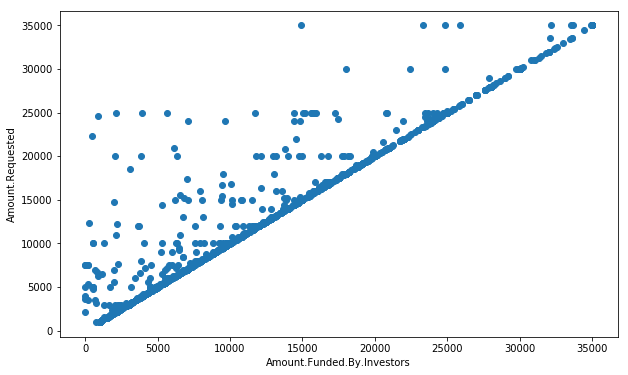

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(data['Amount.Funded.By.Investors'],data['Amount.Requested'])
plt.xlabel('Amount.Funded.By.Investors')
plt.ylabel('Amount.Requested')

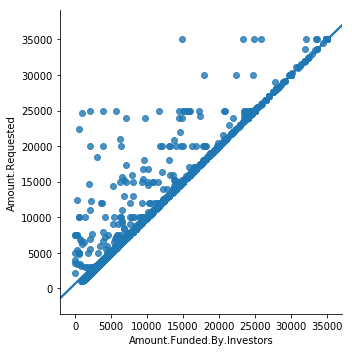

In [19]:
sns.lmplot('Amount.Funded.By.Investors','Amount.Requested', data = data)

Text(0, 0.5, 'Interest.Rate(%)')

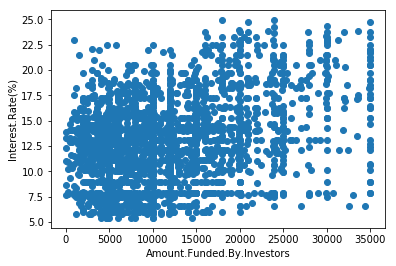

In [20]:
plt.scatter(data['Amount.Funded.By.Investors'],data['Interest.Rate'])
plt.xlabel('Amount.Funded.By.Investors')
plt.ylabel('Interest.Rate(%)')

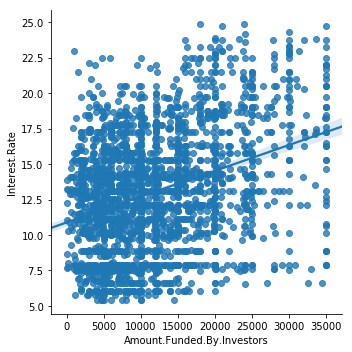

In [21]:
sns.lmplot('Amount.Funded.By.Investors','Interest.Rate', data = data)

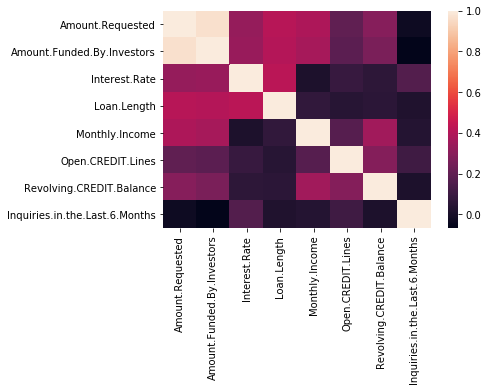

In [22]:
sns.heatmap(data.corr())

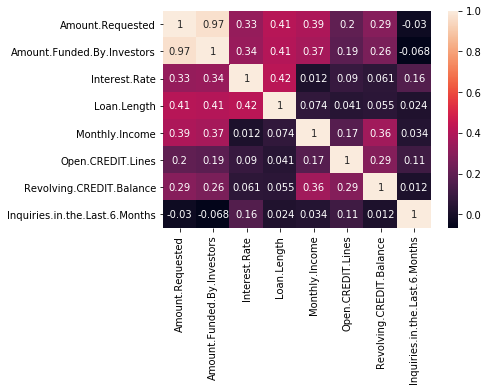

In [23]:
sns.heatmap(data.corr(), annot = True)

In [24]:
features = data[['Amount.Requested','Interest.Rate','Amount.Funded.By.Investors','Loan.Length','Monthly.Income','Revolving.CREDIT.Balance']]
features.head()

,Amount.Requested,Interest.Rate,Amount.Funded.By.Investors,Loan.Length,Monthly.Income,Revolving.CREDIT.Balance
81174,20000,8.90,20000.0,36,6541.67,14272.0
99592,19200,12.12,19200.0,36,4583.33,11140.0
80059,35000,21.98,35000.0,60,11500.00,21977.0
15825,10000,9.99,9975.0,36,3833.33,9346.0
33182,12000,11.71,12000.0,36,3195.00,14469.0


In [25]:
label = data[['Interest.Rate']]

In [26]:
label

,Interest.Rate
81174,8.90
99592,12.12
80059,21.98
15825,9.99
33182,11.71
62403,15.31
48808,7.90
22090,17.14
76404,14.33
15867,6.91


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.1)

In [29]:
print(features_train.shape)

(2250, 6)


In [30]:
print(features_test.shape)

(250, 6)


In [31]:
print(label_train.shape)

(2250, 1)


In [32]:
print(label_test.shape)

(250, 1)


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()